# Описание тестового стенда

Были закрыты все приложения, сделан bash-скрипт, который чистил кэш и запускал программу на данных. Программа была скомпилирована в release mode (dotnet build -c release)

# Датасет

(здесь датасет)

In [3]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

In [14]:
with open("measure1.txt") as file:
    t = [int(x) for x in file]
print(t)


[8598, 8635, 8737, 8760, 8666, 8757, 8690, 8812, 8607, 8799, 8971, 8721, 8775, 8683, 8823, 8763, 9344, 9639, 8741, 8939, 8919, 8718, 8840, 8938, 8840, 8969, 8942, 8783, 8931, 8656, 8631, 8685, 8862, 8846, 8885, 8891, 8831, 8791, 8709, 8809]


# Гистограмма

(array([ 9., 12., 10.,  7.,  0.,  0.,  0.,  1.,  0.,  1.]),
 array([8598. , 8702.1, 8806.2, 8910.3, 9014.4, 9118.5, 9222.6, 9326.7,
        9430.8, 9534.9, 9639. ]),
 <BarContainer object of 10 artists>)

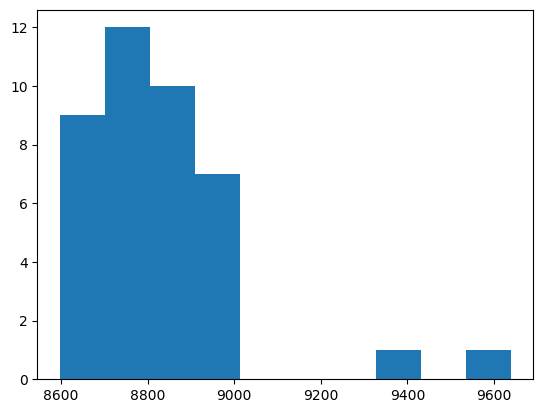

In [15]:
plt.hist(t)

# Нормальность

In [11]:
stats.normaltest(t)

NormaltestResult(statistic=40.566394600632535, pvalue=1.5528136394785158e-09)

In [13]:
stats.shapiro(t)

ShapiroResult(statistic=0.7666880488395691, pvalue=1.4678726074635051e-06)

# Среднее и стандартное отклонение

In [17]:
np.mean(t)

8823.4

In [19]:
np.std(t, ddof=1)

189.3337576737751

# Доверительный интервал

In [20]:
stats.t.ppf(0.975, df=len(t)-1)*stats.sem(t)

60.551873062111